# Data Analysis Interview Challenge

This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.

In [371]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn
import seaborn as sns

### Import the dataset

In [372]:
df1 = pd.read_json('logins.json')

In [373]:
df2 = pd.read_json('ultimate_data_challenge.json')

In [374]:
#Shape of df1
df1.shape

(93142, 1)

In [375]:
# Data in df1
df1.head(5)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [376]:
# Shape of df2
df2.shape

(50000, 12)

In [377]:
# Data in df2
df2.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

# Part 1 ‑ Exploratory data analysis

In [378]:
# Details of df1, columns and Nulls
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [379]:
# Set index to login time and create the count of logins every 15 mins
df1.set_index('login_time', inplace=True)
df1['count'] = 1
newdf1 = df1.resample('15T',label='right', closed='right').sum()

In [380]:
newdf1.head(2)

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6


In [381]:
newdf1.index.values

array(['1970-01-01T20:15:00.000000000', '1970-01-01T20:30:00.000000000',
       '1970-01-01T20:45:00.000000000', ...,
       '1970-04-13T18:30:00.000000000', '1970-04-13T18:45:00.000000000',
       '1970-04-13T19:00:00.000000000'], dtype='datetime64[ns]')

In [382]:
newdf1['logintime'] = pd.to_datetime(newdf1.index)

In [383]:
newdf1.head(2)

,count,logintime
login_time,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00
1970-01-01 20:30:00,6,1970-01-01 20:30:00


In [384]:
# Create new attributes on Month, Day, Hour, Week, Weekday
newdf1['month'] = newdf1.logintime.dt.month
newdf1['day'] = newdf1.logintime.dt.day
newdf1['hour'] = newdf1.logintime.dt.hour
newdf1['week'] = newdf1.logintime.dt.week
newdf1['weekday'] = newdf1.logintime.dt.weekday

In [385]:
newdf1.head(3)

,count,logintime,month,day,hour,week,weekday
login_time,,,,,,,
1970-01-01 20:15:00,2,1970-01-01 20:15:00,1,1,20,1,3
1970-01-01 20:30:00,6,1970-01-01 20:30:00,1,1,20,1,3
1970-01-01 20:45:00,9,1970-01-01 20:45:00,1,1,20,1,3


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

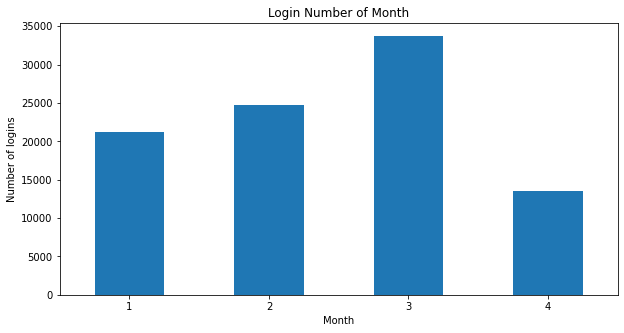

In [386]:
# Monthly Login - Bar Plot
newdf1.groupby('month')['count'].sum().plot(kind='bar')
plt.title("Login Number of Month")
plt.xlabel("Month")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

It seems like there has been a maximum login in 3rd Month

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

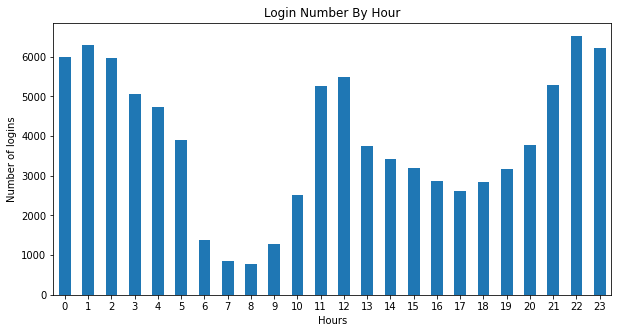

In [387]:
# Login Count by Hours
newdf1.groupby('hour')['count'].sum().plot(kind='bar')
plt.title("Login Number By Hour")
plt.xlabel("Hours")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

As we can see that, the maximum login happens at late night and early morning like 11 PM till 3 AM. There is less login in monring and least during 7 AM and 8 AM. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

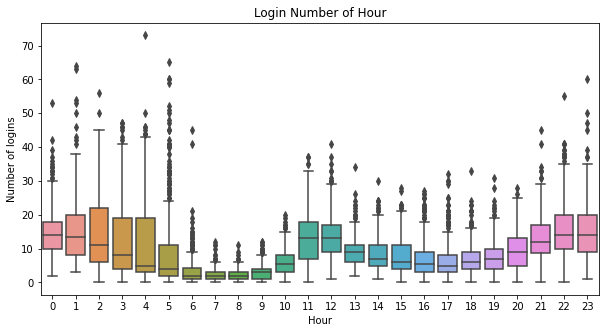

In [388]:
sns.mpl.rc("figure", figsize=(10,5))
sns.boxplot(x='hour', y='count', data=newdf1)
plt.title("Login Number of Hour")
plt.xlabel("Hour")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)

We can see some outliers in early morning, but its clear that majority of login is in early morning, the most right skewed data distribution is during 4 AM.

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

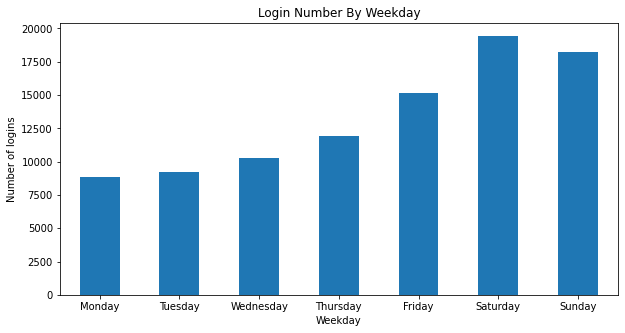

In [389]:
ax = (newdf1.groupby('weekday')['count'].sum().plot(kind='bar'))
plt.title("Login Number By Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=0)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

We can see that most of the login is Saturday, followed by Sunday. Least logins are on Monday. But as the weekends approaches the count of login increases.

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

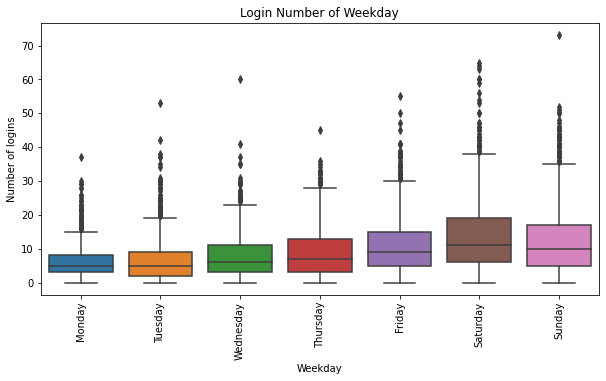

In [390]:
import calendar
ax = sns.boxplot(x='weekday', y='count', data=newdf1)
plt.title("Login Number of Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of logins")
plt.xticks(rotation=90)
ax.set_xticklabels([calendar.day_name[d] for d in range(7)])

Sunday has the big outlier, probably needs to be analysed further.

## Interpretation - 



## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the observation
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Solution:

To make the experiment successfull, we need to closly monitor the below metriccs - 
    1. The average wait time is reduced for riders
    2. The declined service or trip cancellation is reduced.
    3. The trip cost is increased, means driver partners are travelling across cities.
    4. The total toll reimbursment is increasing between two cities, as it is getting higher, means driver partners are travelling across cities.
    
We can perform the A/B testing, with the our assumptions for Null Hypothesis between samples, and if we find that the null hypothesis is rejected, then we have more probablity of this experiment to be successfull.

Taking the sample for before and after, calculating the p-value, t-stats, to access the significance of the test between the samples and decide weather to to accept and reject the null hupothesis. With my pre-toll sample data and post-toll sample data are different or their is a statiscally significant.

With verifying the patterns, trends and visualization on daliy data, cost, reiumbursement and other features, we can provided recommendations to the Utimate Managers of city.

## Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

### Data description

* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYY MM DD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [391]:
df2.shape

(50000, 12)

In [392]:
df2.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [393]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [394]:
df2.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [395]:
df2['avg_rating_by_driver'].fillna(df2['avg_rating_by_driver'].mean(), inplace=True)
df2['avg_rating_of_driver'].fillna(df2['avg_rating_of_driver'].mean(), inplace=True)

In [396]:
#df['phone'].fillna(max(df2['phone']))
df2['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [397]:
df2['phone'].fillna('iPhone', inplace=True)

In [398]:
df2.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

## Data Visualization

In [399]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [400]:
df2.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [401]:
# Create box plots of all categorical, non-date data
categorical_features = ['city', 'phone', 'ultimate_black_user']

# Show distributions of numerical features
numerical_features = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                      'avg_surge', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct']

In [402]:
df2['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

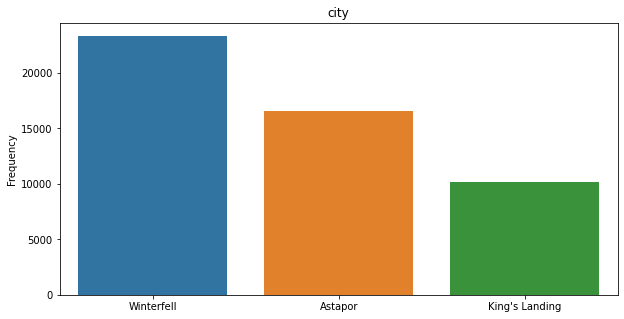

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64


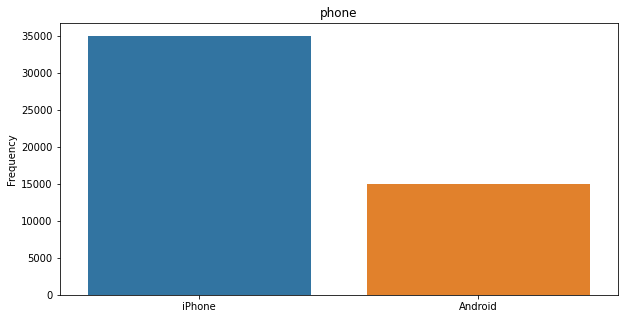

iPhone     34978
Android    15022
Name: phone, dtype: int64


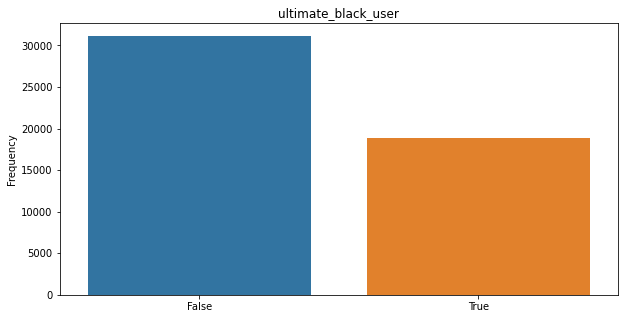

False    31146
True     18854
Name: ultimate_black_user, dtype: int64


In [403]:
for feature in categorical_features:
    sns.barplot(x = list(df2[feature].value_counts().index), y = df2[feature].value_counts())
    plt.title(feature)
    plt.ylabel('Frequency')
    plt.show()
    print(df2[feature].value_counts())

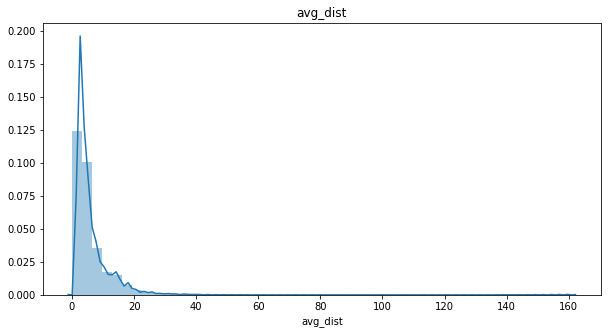

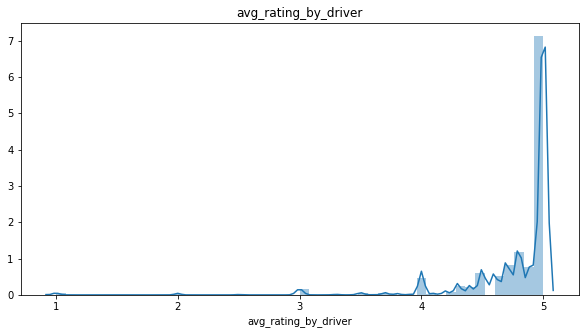

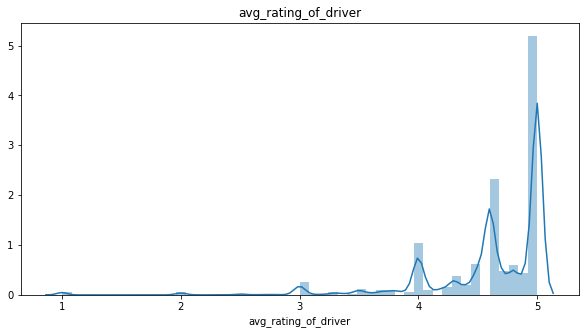

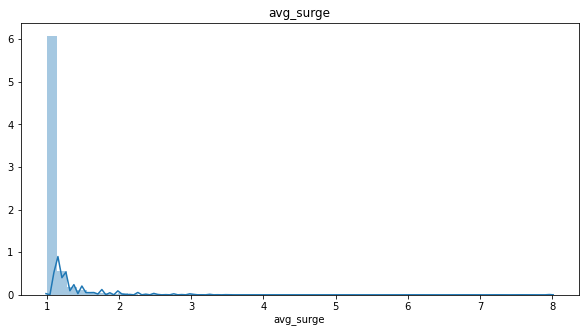

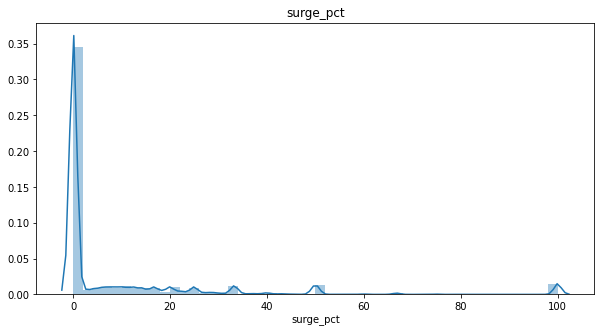

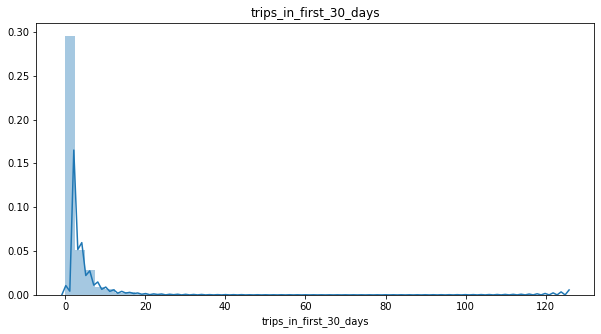

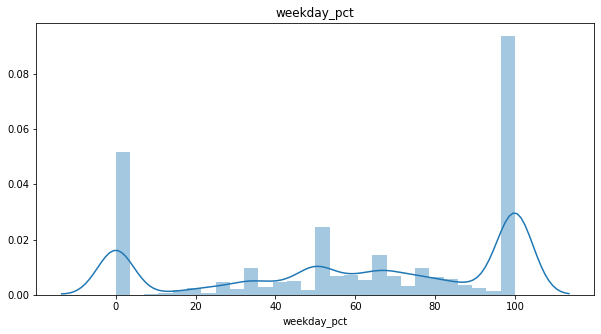

In [404]:
for feature in numerical_features:
    sns.distplot(df2[feature])
    plt.title(feature)
    plt.show();

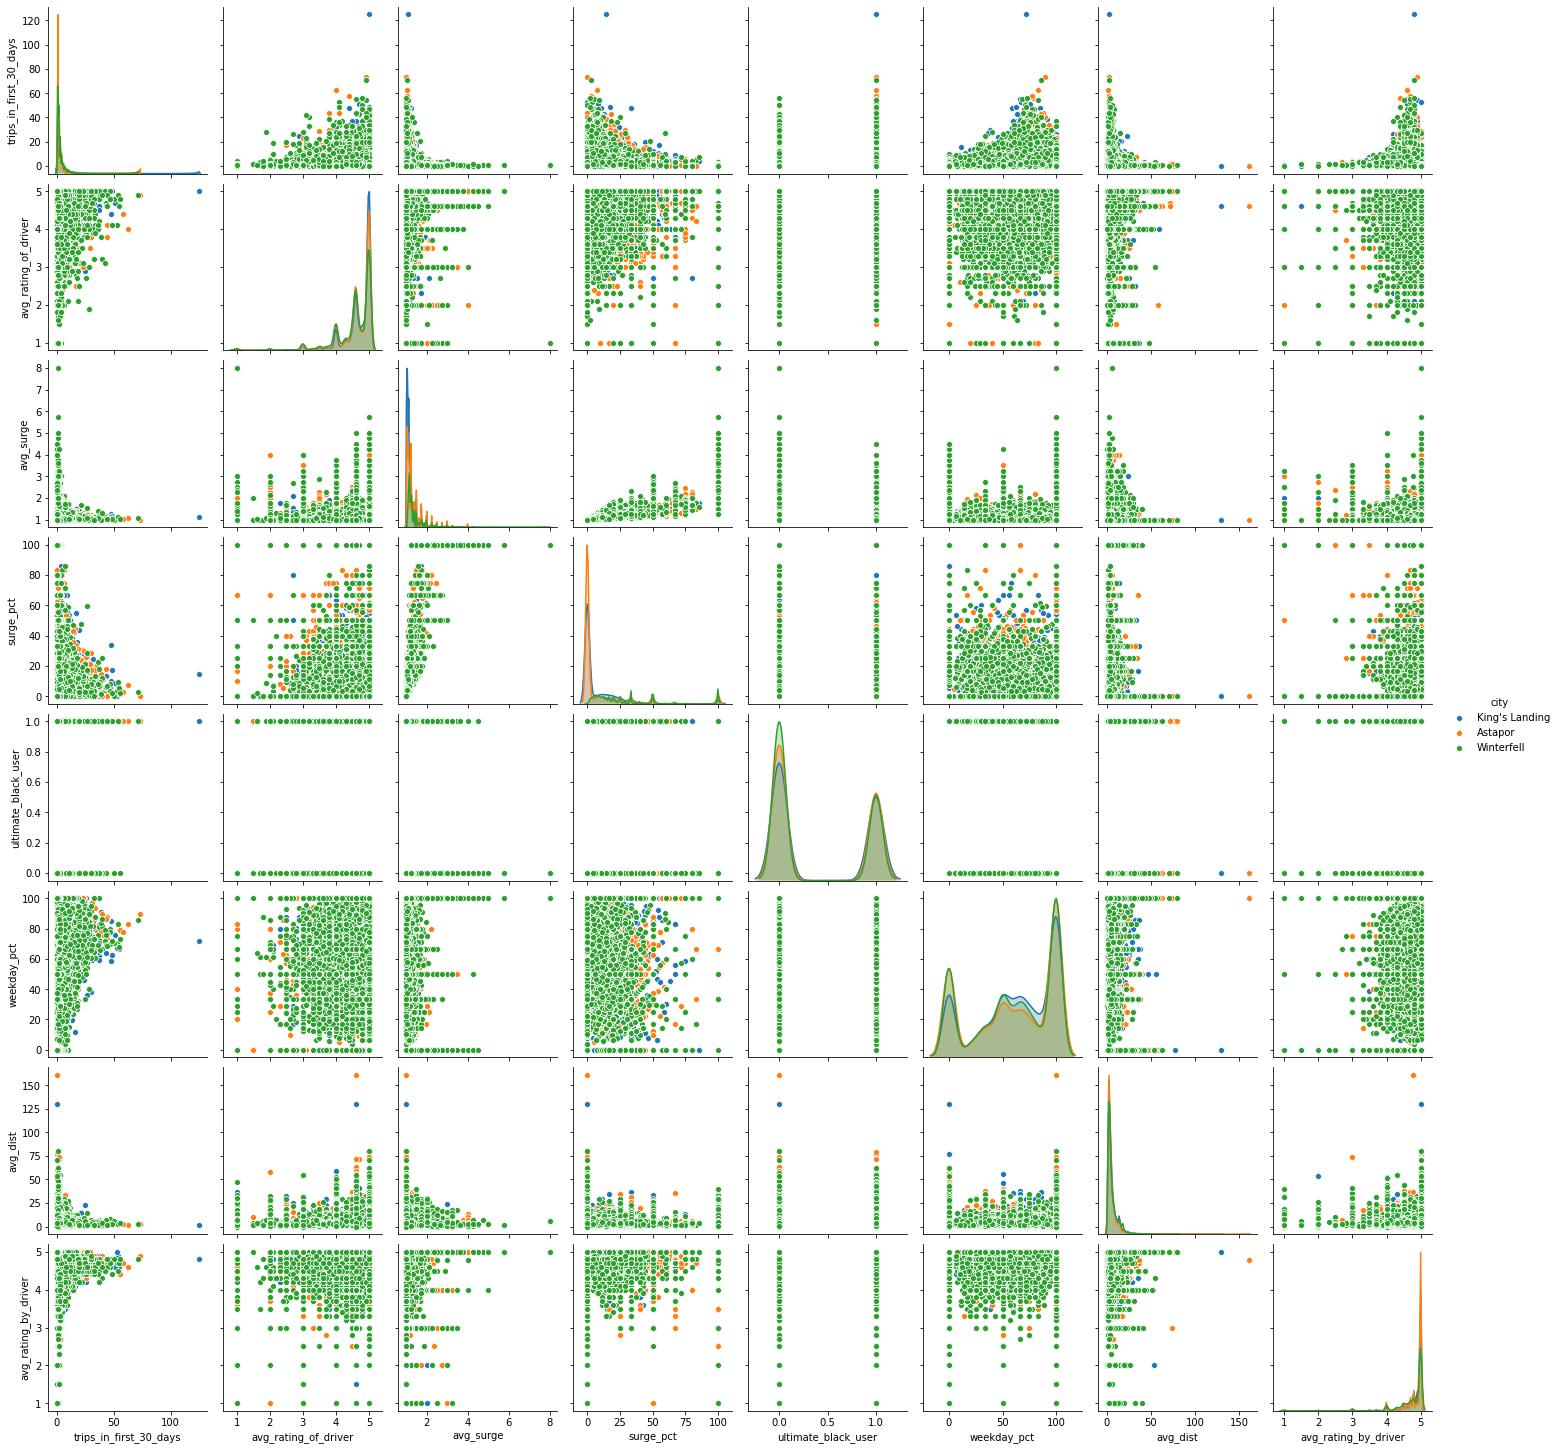

In [405]:
sns.pairplot(df2, hue = 'city')

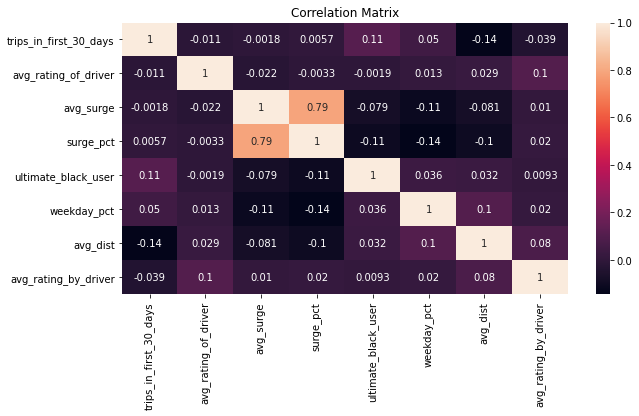

In [406]:
# Create a heatmap 
corr = df2.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

In [407]:
df2.head(2)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0


In [408]:
df2['signup_date'] = pd.to_datetime(df2['signup_date'], errors='coerce')
df2['month'] = df2.signup_date.dt.month
df2['day'] = df2.signup_date.dt.day
df2['hour'] = df2.signup_date.dt.hour
df2['week'] = df2.signup_date.dt.week
df2['weekday'] = df2.signup_date.dt.weekday

In [409]:
df2.head(2)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,month,day,hour,week,weekday
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,25,0,4,5
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,1,29,0,5,2


In [410]:
print(min(df2['signup_date']))
print(max(df2['signup_date']))

2014-01-01 00:00:00
2014-01-31 00:00:00


## Model Implementation

In [411]:
## Lets create the Target Variable still continued in their 6th month
df2['uretention'] = (df2['last_trip_date'] > '2014-06-01')*1

In [412]:
df2.head(2)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,month,day,hour,week,weekday,uretention
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,25,0,4,5,1
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,1,29,0,5,2,0


In [413]:
len(df2.loc[(df2['uretention'] == 0)])

31690

In [414]:
len(df2.loc[(df2['uretention'] == 1)])

18310

In [415]:
print('{:.2f}% user are retained in their 6th month'. 
      format(len(df2.loc[(df2['uretention'] == 1)])/len(df2)* 100))

36.62% user are retained in their 6th month


In [416]:
# Drop datetime features
df2.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

In [417]:
# Creating dummy variables for categorical features
mdf2 = pd.get_dummies(df2, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)

In [418]:
mdf2.head(3)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,month,day,hour,week,weekday,uretention,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,4,4.7,1.1,15.4,46.2,3.67,5.0,1,25,0,4,5,1,1,0,1,1
1,0,5.0,1.0,0.0,50.0,8.26,5.0,1,29,0,5,2,0,0,0,0,0
2,3,4.3,1.0,0.0,100.0,0.77,5.0,1,6,0,2,0,0,0,0,1,0


In [419]:
y = mdf2['uretention']
X = mdf2.drop('uretention', axis=1)

In [420]:
# Create Train and Test Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [421]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 16) (10000, 16) (40000,) (10000,)


In [422]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,roc_curve

In [423]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [424]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [425]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[5439  883]
 [1499 2179]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      6322
           1       0.71      0.59      0.65      3678

   micro avg       0.76      0.76      0.76     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.76      0.76      0.76     10000



=== All AUC Scores ===
[0.81504269 0.81249282 0.81270092 0.80575884 0.81292281 0.81192237
 0.81268248 0.81198286 0.81653784 0.8141921 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8126235708811416


## Tuning Hyperparameters

In [426]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 75)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(50, 200, num = 50)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, 
                                verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 36.4min finished


{'n_estimators': 447, 'max_features': 'sqrt', 'max_depth': 163}


In [431]:
rfc = RandomForestClassifier(n_estimators=447, max_depth=163, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[5366  956]
 [1279 2399]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6322
           1       0.72      0.65      0.68      3678

   micro avg       0.78      0.78      0.78     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.77      0.78      0.77     10000



=== All AUC Scores ===
[0.83692487 0.83985174 0.8354317  0.82994573 0.84117946 0.83578397
 0.8375621  0.83847215 0.84741899 0.83855548]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8381126195380941


In [434]:
# Generate classification report
print(classification_report(y_test, rfc_predict))
print('Test set accuracy: {:.2f}%'.format(accuracy_score(y_test, rfc_predict)*100))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6322
           1       0.72      0.65      0.68      3678

   micro avg       0.78      0.78      0.78     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.77      0.78      0.77     10000

Test set accuracy: 77.65%


In [428]:
fi = pd.DataFrame(list(zip(X.columns, rfc.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
5,avg_dist,0.190058
4,weekday_pct,0.112618
6,avg_rating_by_driver,0.109898
8,day,0.076794
3,surge_pct,0.074401


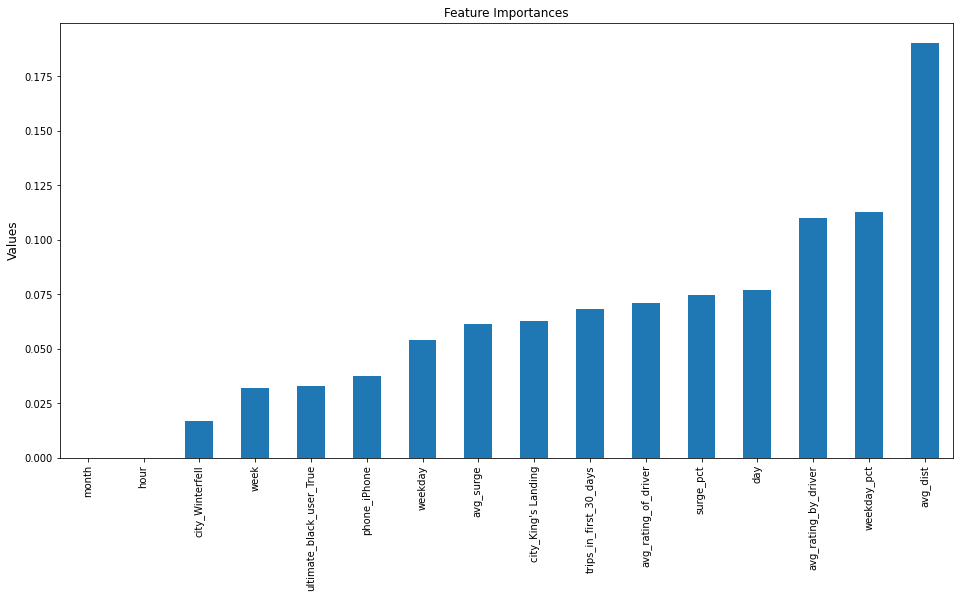

In [429]:
# Plot feature importance
feature_indices = np.argsort(rfc.feature_importances_)
li = pd.DataFrame(index=X_train.columns[feature_indices], data=np.sort(rfc.feature_importances_))

ax = li.plot(kind="bar", title="Feature Importances", figsize=(16, 8))
ax.set_ylabel("Values", fontsize="large")
ax.legend_.remove()

Text(0.5, 1.0, 'ROC Curve')

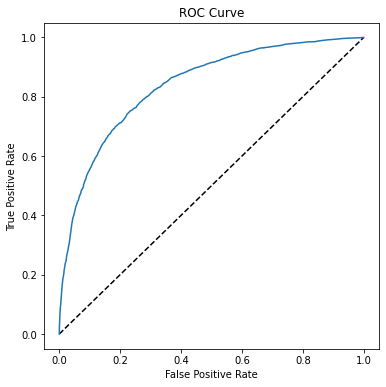

In [430]:
# Compute predicted probabilities
y_pred_prob = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

### Results - 

1. Important Features are - 
       a. avg_dist - the average distance in miles per trip taken in the first 30 days after signup
       b. weekday_pct - the percent of the user’s trips occurring during a weekday
       c. avg_rating_by_driver - the rider’s average rating over all of their trips
    
2. The Performance of the model is - 
       a. Accuracy is 0.84
       b. Testset Accuracy is 77.65%



### Key Insights - 

There is 36.62% percent of riders are retained and mostly on saturday and sundays.
Need to encourage the riders to take longer distance ride, may be getting some promotional offer for attracting rider to participate.
Need to encourage the riders to take more rides during weekdays and can focus to provide better service to riders.